In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 12)})


In [449]:
df=pd.read_csv("train_ctrUa4k.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
import ydata_profiling
df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [68]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,5507.822306,1542.394934,145.852552,342.351607,0.850662
std,6404.132369,2524.295797,84.108409,64.861662,0.356759
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2900.000000,0.000000,100.000000,360.000000,1.000000
50%,3816.000000,1086.000000,128.000000,360.000000,1.000000
75%,5815.000000,2232.000000,167.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


# Data Processing

## Remove Loan_ID

In [450]:
df.drop(columns='Loan_ID',inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Checking Duplications

In [109]:
df.duplicated().value_counts()

False    614
dtype: int64

No Duplication

# Checking Outliers

<AxesSubplot:xlabel='ApplicantIncome'>

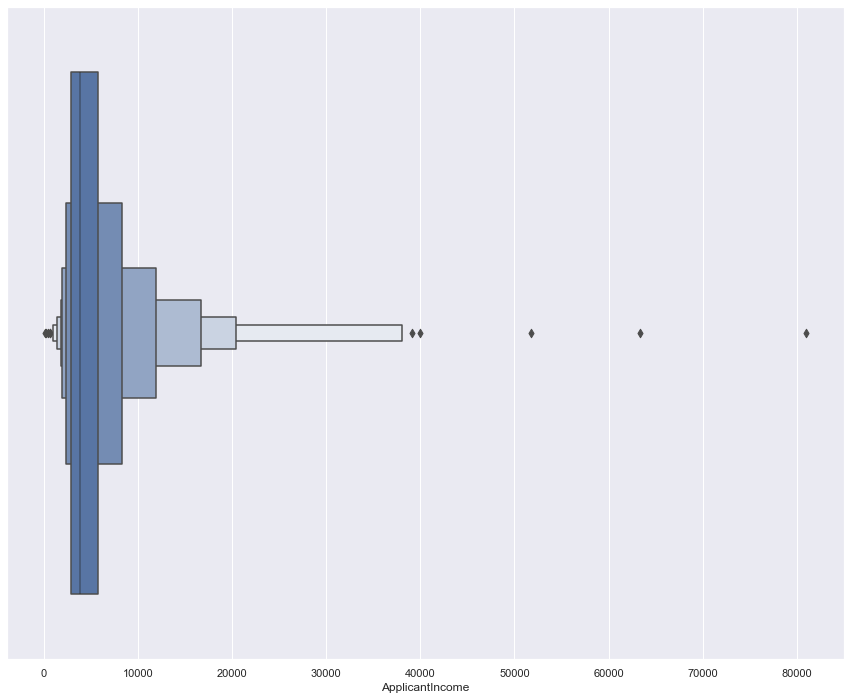

In [398]:
sns.boxenplot(data=df,x=df.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

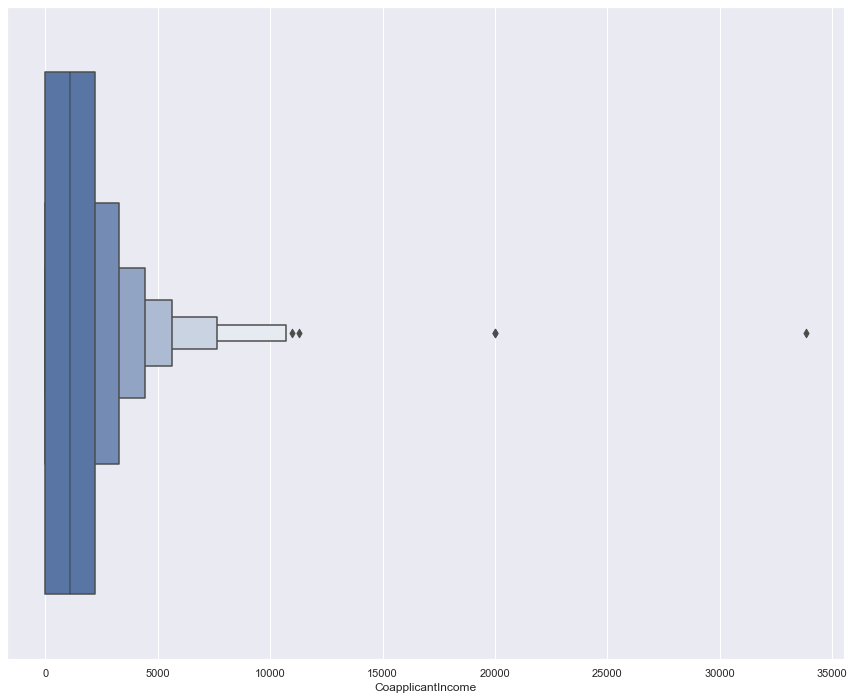

In [113]:
sns.boxenplot(data=df,x=df.CoapplicantIncome)

varies as reputation of company and job positions increased 

<AxesSubplot:xlabel='LoanAmount'>

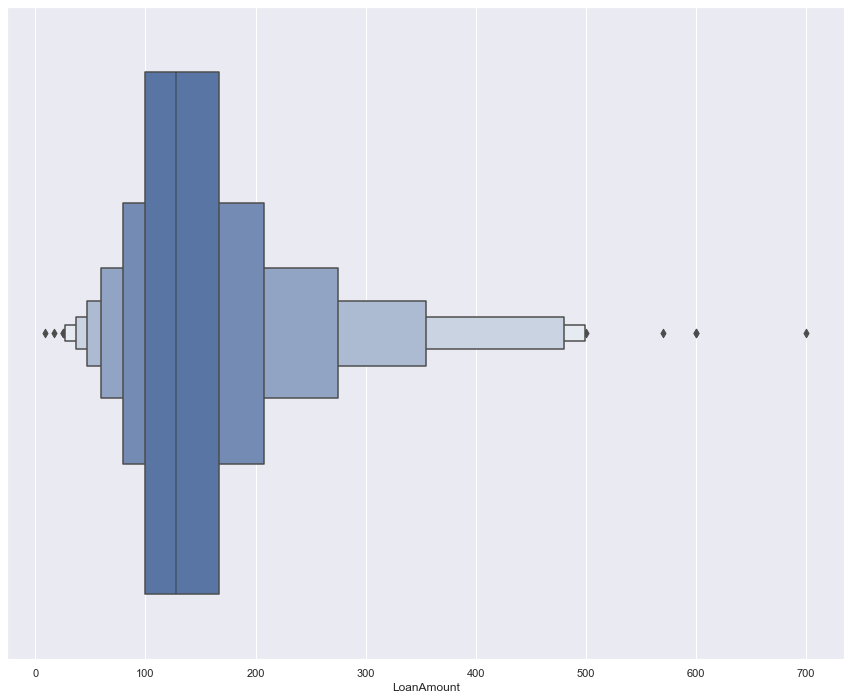

In [112]:
sns.boxenplot(data=df,x=df.LoanAmount)

No Outliers in Loan Ammount as Value is increased as People Needs

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             517 non-null    object 
 1   Married            527 non-null    object 
 2   Dependents         517 non-null    object 
 3   Education          529 non-null    object 
 4   Self_Employed      504 non-null    object 
 5   ApplicantIncome    529 non-null    int64  
 6   CoapplicantIncome  529 non-null    float64
 7   LoanAmount         529 non-null    float64
 8   Loan_Amount_Term   529 non-null    float64
 9   Credit_History     529 non-null    float64
 10  Property_Area      529 non-null    object 
 11  Loan_Status        529 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 53.7+ KB


# EDA

In [126]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


## 1. Effect of Gender on Loan Status

<AxesSubplot:xlabel='Gender', ylabel='count'>

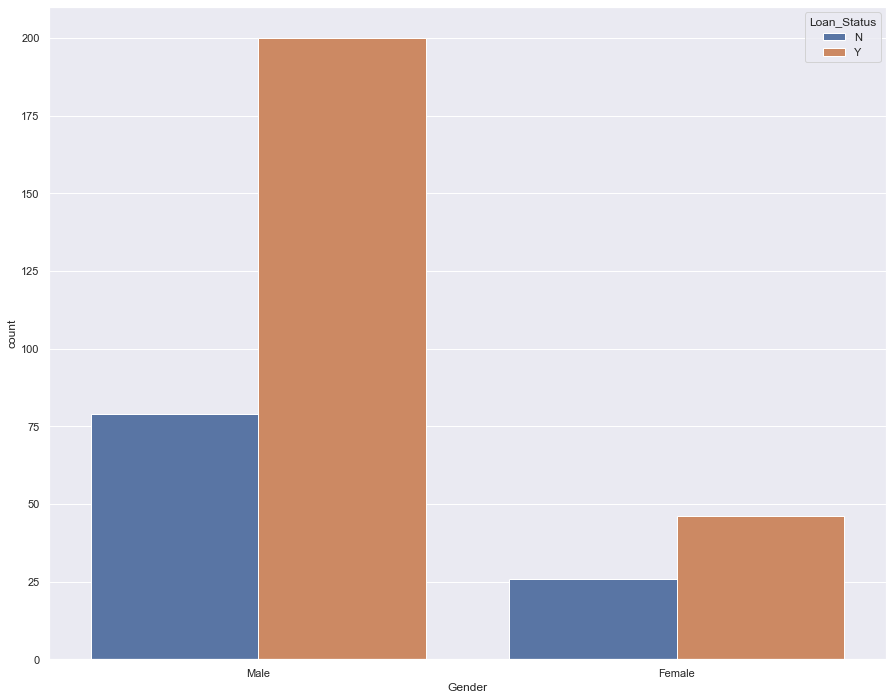

In [128]:
sns.countplot(data=df,x='Gender',hue='Loan_Status')

No Effect as number of No and Yes Equal in precentage for each gender

## Are Married People Effect in Accepting a Loan


<AxesSubplot:xlabel='Married', ylabel='count'>

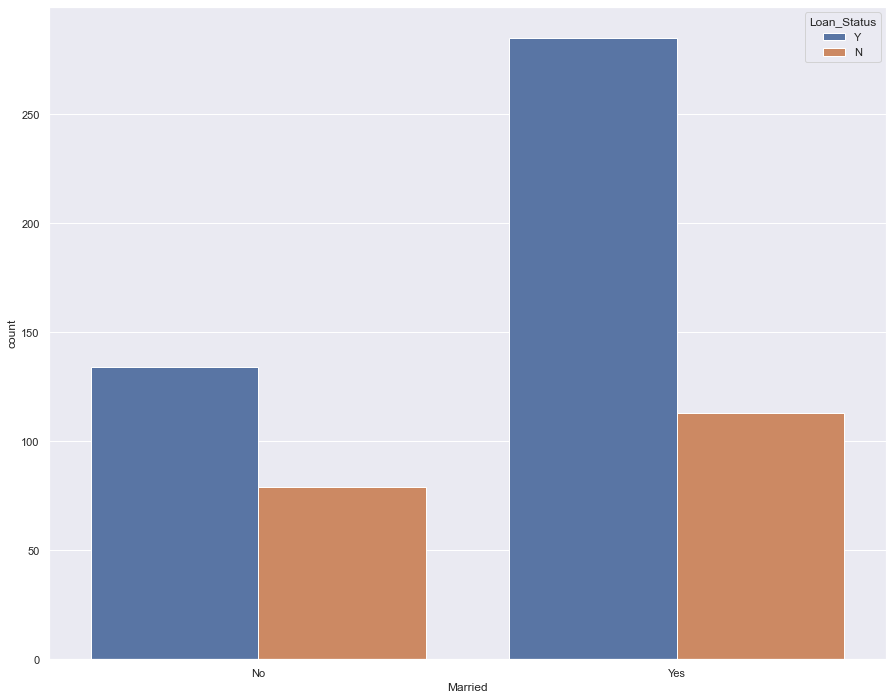

In [454]:
sns.countplot(data=df,x='Married',hue='Loan_Status')

Slightly effect in married people getting the loan 

## is increasing in number of dependencies effect the decision of Loan Acceptance

<AxesSubplot:xlabel='Dependents', ylabel='count'>

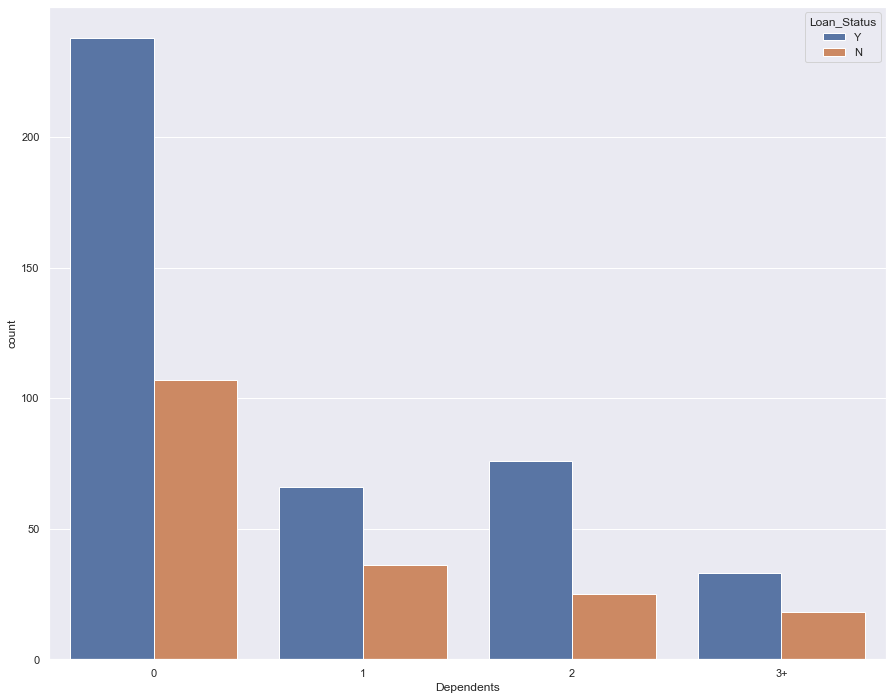

In [455]:
sns.countplot(data=df,x='Dependents',hue='Loan_Status')

most accepted loans are in 0 dependents

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

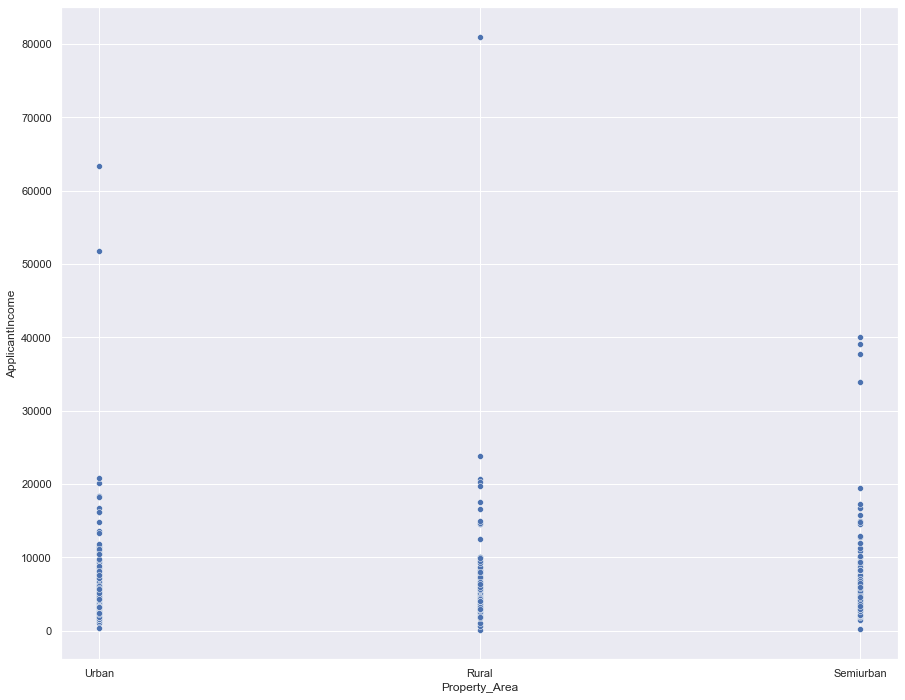

In [457]:
sns.scatterplot(data=df,x='Property_Area',y='ApplicantIncome',estimator='Avarage')

Mostly no effect on what your income is according to salary

# Data Preprocessing

## Label Encoding 

In [418]:
Gender_map = {                             
    'Male':0,
    'Female':1
}

Married_map = {                             
    'No':0,
    'Yes':1
}

Dependents_map = {                             
    '0':0,
    '1':1,
    '2':2,
    '3+':3
}

Education_map = {
    'Not Graduate':0,
    'Graduate':1
}

Self_Employed_map = {                            
    'No':0,
    'Yes':1
}

Property_Area_map = {
    'Urban':0,
    'Semiurban':1,
    'Rural':2
}

Loan_Status_map = {
    'N':0,
    'Y':1
}


In [419]:
df['Gender'] = df['Gender'].map(Gender_map)

df['Married'] = df['Married'].map(Married_map)

df['Dependents'] = df['Dependents'].map(Dependents_map)

df['Education'] = df['Education'].map(Education_map)

df['Self_Employed'] = df['Self_Employed'].map(Self_Employed_map)

df['Property_Area'] = df['Property_Area'].map(Property_Area_map)

df['Loan_Status'] = df['Loan_Status'].map(Loan_Status_map)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,2,1
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,2,1
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


## Impute (Gender, Married, Dependents, Self employed) as they will not strongly effect the target

In [420]:
from sklearn.impute import KNNImputer

Imputer = KNNImputer(n_neighbors=3)

df = Imputer.fit_transform(df)

In [421]:
df = pd.DataFrame(df,columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1.0,0.0,5849.0,0.0,138.0,360.0,1.0,0.0,1.0
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,2.0,0.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,2.0,1.0
610,0.0,1.0,3.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,2.0,1.0
611,0.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,0.0,1.0
612,0.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,0.0,1.0


## Train_Test Split

In [422]:
x = df.drop('Loan_Status', axis=1)                   #Put All Features in x Variable (Excluding the Target)
y = df['Loan_Status']                                #Put the Target in Y Variable

In [423]:
from sklearn.model_selection import train_test_split              #Split the Data into Train and Test with No rendom Choice of Data each time

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Imbalanced Classes

In [424]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

## Data Scaling

In [425]:
from sklearn.preprocessing import PowerTransformer             # Normalize the Values So no Feature effect the other

Scalar = PowerTransformer()

Scalar.fit_transform(X_train_res)

array([[-0.52803982,  0.74616833,  0.61426248, ...,  0.18024763,
         0.66045328, -1.31357052],
       [-0.52803982, -1.41938968, -0.99765955, ...,  0.18024763,
         0.66045328,  1.28077529],
       [-0.52803982, -1.41938968,  1.23016763, ...,  0.18024763,
         0.66045328,  1.28077529],
       ...,
       [-0.52803982, -0.55541143,  0.71321692, ..., -0.44361281,
        -1.30409598,  0.66276661],
       [ 1.27407948, -1.41938968, -0.99765955, ...,  3.47182257,
        -1.60419069,  0.35474105],
       [-0.52803982,  0.74616833,  0.63937168, ...,  0.18024763,
        -1.22593954,  1.28077529]])

In [426]:
from sklearn.preprocessing import PowerTransformer                     # Normalize the Values So no Feature effect the other
   
Scalar = PowerTransformer()

Scalar.fit_transform(x_test)

array([[-0.50186756, -1.18585412, -0.72944028, ...,  0.16533953,
         0.44946722,  0.0867151 ],
       [ 2.00158094, -1.18585412, -0.72944028, ...,  0.16533953,
         0.44946722,  0.0867151 ],
       [-0.50186756,  0.84327404, -0.72944028, ...,  0.16533953,
         0.44946722, -1.33758065],
       ...,
       [-0.50186756,  0.84327404, -0.72944028, ...,  0.16533953,
         0.44946722, -1.33758065],
       [-0.50186756, -1.18585412, -0.72944028, ...,  0.16533953,
         0.44946722,  0.0867151 ],
       [-0.50186756,  0.84327404,  1.14223497, ...,  0.16533953,
        -2.29179627,  0.0867151 ]])

# ML Models

## Logistic Regression 

In [447]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

pred = model.predict(x_test)

model.score(x_test,y_test)

0.8181818181818182

## KNN Classifier

In [448]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)

neigh.score(x_test,y_test)

0.5584415584415584

## Decision Tree Classifier

In [441]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

Tree.fit(X_train_res, y_train_res)

r2_train = Tree.score(X_train_res, y_train_res)
r2_test = Tree.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.8745980707395499
R2 Score of Decision Tree Test: 0.7532467532467533


## Random Forest 

In [442]:
from sklearn.model_selection import GridSearchCV

Desicion_Tree = DecisionTreeClassifier()
parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'max_leaf_nodes': [10, 15, 20, 25, 30]
}

grid = GridSearchCV(Desicion_Tree, parameters)

In [443]:
grid.fit(X_train_res, y_train_res)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_leaf_nodes': [10, 15, 20, 25, 30]})

In [444]:
r2_train = grid.score(X_train_res, y_train_res)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.8536977491961415
R2 Score of Decision Tree Test: 0.7597402597402597


In [445]:
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15}

## XGBoost Classifier

In [446]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=5, max_depth=4, max_leaves=11)

XGB.fit(X_train_res, y_train_res)

r2_train = XGB.score(X_train_res, y_train_res)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.8553054662379421
R2 Score of XGBoost Test: 0.7857142857142857


# Deploy Model

In [435]:
import joblib

joblib.dump(XGB, 'Final_Model.h5')

['Final_Model.h5']

# Creating Requirements File

In [211]:
import pipreqs

In [241]:
! pipreqs --encoding utf-8 "./"

INFO: Successfully saved requirements file in ./requirements.txt
